<a href="https://colab.research.google.com/github/MBrillian354/machine_learning/blob/main/thrivein_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Processing: Catogorical Object Classification UMKM

## Import

In [ ]:
from google.colab import drive
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

### Load Dataset From Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


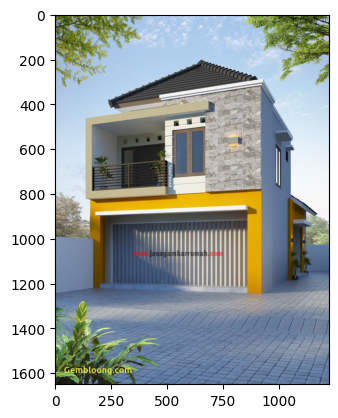

In [ ]:
plt.imshow(load_img(r'drive/Shareddrives/ML Dataset/without_both/Type0_Ads (1).jpg'))
plt.show()

**Label:**
1. Without Both (**!=** banner **&&** plang)
2. Either Banner OR Plang (banner **||** plang)
3. Both and them (banner **&&** plang)

## Cek file directory Shareddrives

In [ ]:
# Cek direktory Shareddrives

sourc_data_dir = '/content/drive/Shareddrives/ML Dataset/'

root_dir = '/content/dataset'

train_dir = '/train'
validation_dir = '/validation'

single_dir = os.path.join(sourc_data_dir, 'without_both')


print(os.listdir(os.path.join(sourc_data_dir, 'without_both')))

['Type0_Ads (15).jpg', 'Type0_Ads (1).jpg', 'Type0_Ads (7).jpg', 'Type0_Ads (12).jpg', 'Type0_Ads (14).jpg', 'Type0_Ads (10).jpg', 'Type0_Ads (16).jpg', 'Type0_Ads (6).jpg', 'Type0_Ads (5).jpg', 'Type0_Ads (11).jpg', 'Type0_Ads (4).jpg', 'Type0_Ads (3).jpg', 'Type0_Ads (18).jpg', 'Type0_Ads (13).jpg', 'Type0_Ads (2).jpg', 'Type0_Ads (17).jpg', 'Type0_Ads (1).png', 'Type0_Ads (2).png', 'Type0_Ads (3).png', 'Type0_Ads (4).png', 'Type0_Ads (5).png', 'Type0_Ads (6).png', 'Type0_Ads (8).jpg', 'Type0_Ads (25).jpg', 'Type0_Ads (9).jpg', 'Type0_Ads (27).jpg', 'Type0_Ads (28).jpg', 'Type0_Ads (19).jpg', 'Type0_Ads (20).jpg', 'Type0_Ads (22).jpg', 'Type0_Ads (24).jpg', 'Type0_Ads (26).jpg', 'Type0_Ads (23).jpg', 'Type0_Ads (21).jpg', 'kios-dan-rumah-siap-pakai-di-curug-ec0fe81043e1afed886042be573dae4f_thumb.jpg', '2149_1.jpg', 'kios-baru-siap-huni-1-lantai-posisi-strategis-5-menit-exit-tol-jatiwarna-bekasi-K9GWYBCB.jpg', 'images (97).jpeg', 'images (87).jpeg', '95.jpg', 'disewakan-kios-pinggir-j

## Create dataset folder in Virtual Machine

In [ ]:
# Create dataset folder


if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """

  training_dir =   os.path.join(root_path, 'training')
  validation_dir =   os.path.join(root_path, 'validation')

  os.makedirs(training_dir)
  os.makedirs(validation_dir)

  os.makedirs(os.path.join(training_dir, 'without_both'))
  os.makedirs(os.path.join(training_dir, 'either_banner_or_logo'))
  os.makedirs(os.path.join(training_dir, 'both_banner_and_logo'))

  os.makedirs(os.path.join(validation_dir, 'without_both'))
  os.makedirs(os.path.join(validation_dir, 'either_banner_or_logo'))
  os.makedirs(os.path.join(validation_dir, 'both_banner_and_logo'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# check dataset folder

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/dataset/training
/content/dataset/validation
/content/dataset/training/either_banner_or_logo
/content/dataset/training/without_both
/content/dataset/training/both_banner_and_logo
/content/dataset/validation/either_banner_or_logo
/content/dataset/validation/without_both
/content/dataset/validation/both_banner_and_logo


## Split dataset based on labels

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """


  source = SOURCE_DIR

  list_files = os.listdir(source)

  list_shuffled = random.sample(list_files, len(list_files))
  list_len = len(list_shuffled)
  len_train = list_len * SPLIT_SIZE
  len_val = list_len - len_train

  x = 0
  for i, items in enumerate(list_shuffled):
    if x < len_train:
      if os.path.getsize(os.path.join(source, items)) > 0:
        copyfile(os.path.join(source, items), os.path.join(TRAINING_DIR, items))
      else:
        print(f"{items} is zero length, so ignoring.")
    else:
      if os.path.getsize(os.path.join(source, items)) > 0:
        copyfile(os.path.join(source, items), os.path.join(VALIDATION_DIR, items))
      else:
        print(f"{items} is zero length, so ignoring.")
    x += 1

In [ ]:
without_both_SOURCE_DIR = os.path.join(sourc_data_dir, 'without_both')
either_banner_or_logo_SOURCE_DIR = os.path.join(sourc_data_dir, 'either_banner_or_logo')
both_banner_and_logo_SOURCE_DIR = os.path.join(sourc_data_dir, 'both_banner_and_logo')

TRAINING_DIR = os.path.join(root_dir, 'training')
VALIDATION_DIR = os.path.join(root_dir, 'validation')

TRAINING_without_both_DIR = os.path.join(TRAINING_DIR, 'without_both')
TRAINING_either_banner_or_logo_DIR = os.path.join(TRAINING_DIR, 'either_banner_or_logo')
TRAINING_both_banner_and_logo_DIR = os.path.join(TRAINING_DIR, 'both_banner_and_logo')

VALIDATION_without_both_DIR = os.path.join(VALIDATION_DIR, 'without_both')
VALIDATION_either_banner_or_logo_DIR = os.path.join(VALIDATION_DIR, 'either_banner_or_logo')
VALIDATION_both_banner_and_logo_DIR = os.path.join(VALIDATION_DIR, 'both_banner_and_logo')

# Check if there is empty directory
if len(os.listdir(TRAINING_without_both_DIR)) > 0:
  for file in os.scandir(TRAINING_without_both_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_either_banner_or_logo_DIR)) > 0:
  for file in os.scandir(TRAINING_either_banner_or_logo_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_both_banner_and_logo_DIR)) > 0:
  for file in os.scandir(TRAINING_both_banner_and_logo_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_without_both_DIR)) > 0:
  for file in os.scandir(VALIDATION_without_both_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_either_banner_or_logo_DIR)) > 0:
  for file in os.scandir(VALIDATION_either_banner_or_logo_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_both_banner_and_logo_DIR)) > 0:
  for file in os.scandir(VALIDATION_both_banner_and_logo_DIR):
    os.remove(file.path)


# Define proportion of images used for training
split_size = .68

# Run the function
split_data(without_both_SOURCE_DIR, TRAINING_without_both_DIR, VALIDATION_without_both_DIR, split_size)
split_data(either_banner_or_logo_SOURCE_DIR, TRAINING_either_banner_or_logo_DIR, VALIDATION_either_banner_or_logo_DIR, split_size)
split_data(both_banner_and_logo_SOURCE_DIR, TRAINING_both_banner_and_logo_DIR, VALIDATION_both_banner_and_logo_DIR, split_size)

In [ ]:
print(f"Original without_both's directory has {len(os.listdir(without_both_SOURCE_DIR))} images")
print(f"Original either_banner_or_logo's directory has {len(os.listdir(either_banner_or_logo_SOURCE_DIR))} images")
print(f"Original barelyvisible's directory has {len(os.listdir(both_banner_and_logo_SOURCE_DIR))} images")

print()
print(f"There are {len(os.listdir(TRAINING_without_both_DIR))} images of without_both for training")
print(f"There are {len(os.listdir(TRAINING_either_banner_or_logo_DIR))} images of either_banner_or_logo for training")
print(f"There are {len(os.listdir(TRAINING_both_banner_and_logo_DIR))} images of both_banner_and_logo for training")
print()
print(f"There are {len(os.listdir(VALIDATION_without_both_DIR))} images of without_both for validation")
print(f"There are {len(os.listdir(VALIDATION_either_banner_or_logo_DIR))} images of either_banner_or_logo for validation")
print(f"There are {len(os.listdir(VALIDATION_both_banner_and_logo_DIR))} images of both_banner_and_logo for validation")

Original without_both's directory has 152 images
Original either_banner_or_logo's directory has 648 images
Original barelyvisible's directory has 204 images

There are 104 images of without_both for training
There are 441 images of either_banner_or_logo for training
There are 139 images of both_banner_and_logo for training

There are 48 images of without_both for validation
There are 207 images of either_banner_or_logo for validation
There are 65 images of both_banner_and_logo for validation


In [ ]:
print(f'Total images in the dataset: {len(os.listdir(without_both_SOURCE_DIR))+len(os.listdir(either_banner_or_logo_SOURCE_DIR)) + len(os.listdir(both_banner_and_logo_SOURCE_DIR))}')

Total images in the dataset: 1004


## Using Image Data Generator

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   horizontal_flip = True)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(500, 500))


  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='categorical',
                                                                target_size=(500, 500))

  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 684 images belonging to 3 classes.
Found 320 images belonging to 3 classes.


## Create Model Machine Learning

In [ ]:


  '''tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Conv2D(16, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Conv2D(16, (1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),'''



"tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)),\n  tf.keras.layers.MaxPooling2D(2,2),\n  tf.keras.layers.BatchNormalization(),\n  tf.keras.layers.Dense(128, activation='relu'),\n  tf.keras.layers.Conv2D(16, (2, 2), activation='relu'),\n  tf.keras.layers.MaxPooling2D(2,2),\n  tf.keras.layers.BatchNormalization(),\n  tf.keras.layers.Dense(256, activation='relu'),\n  tf.keras.layers.Conv2D(16, (1, 1), activation='relu'),\n  tf.keras.layers.MaxPooling2D(2,2),\n  tf.keras.layers.BatchNormalization(),\n\n  tf.keras.layers.Flatten(),\n  tf.keras.layers.Dense(128, activation='relu'),\n  tf.keras.layers.Dense(3, activation='softmax'),"

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('val_accuracy') > 0.7):
      print("\nVal Accuracy > 0.72, cancelling training!")
      self.model.stop_training = True

    elif(logs.get('val_loss') < 0.55):
      print("\nVal Loss > < 0.45, cancelling training!")
      self.model.stop_training = True
# Instantiate class
callbacks = myCallback()

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(500, 500, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax'),
    ])



  model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

In [ ]:
# Get the untrained model
model = create_model()

In [ ]:
# Model details
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 498, 498, 16)      448       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 249, 249, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 247, 247, 32)      4640      
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 123, 123, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 60, 60, 64)      

## Train Model

In [ ]:
# Train the model
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/25
35/35 [==============================] - 14s 396ms/step - loss: 0.6648 - accuracy: 0.7251 - val_loss: 0.7737 - val_accuracy: 0.6656
Epoch 2/25
35/35 [==============================] - 14s 408ms/step - loss: 0.6139 - accuracy: 0.7398 - val_loss: 0.7553 - val_accuracy: 0.6906
Epoch 3/25
35/35 [==============================] - 14s 401ms/step - loss: 0.5107 - accuracy: 0.8012 - val_loss: 0.8377 - val_accuracy: 0.6938
Epoch 4/25
35/35 [==============================] - 14s 399ms/step - loss: 0.4633 - accuracy: 0.7982 - val_loss: 0.8600 - val_accuracy: 0.6750
Epoch 5/25
35/35 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.8567
Val Accuracy > 0.72, cancelling training!
35/35 [==============================] - 15s 436ms/step - loss: 0.3626 - accuracy: 0.8567 - val_loss: 1.0431 - val_accuracy: 0.7031


## Output 1: Visualization model with plot

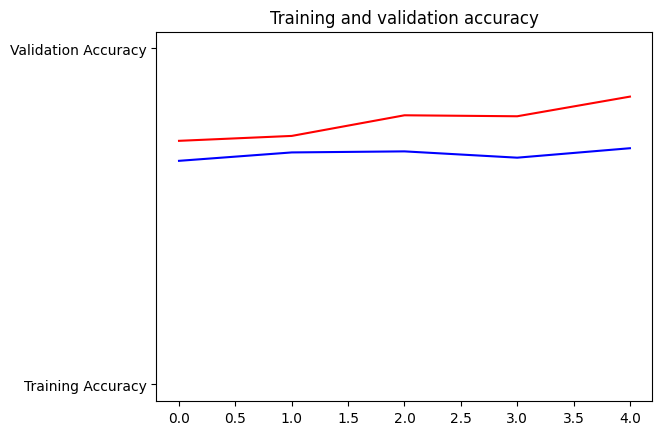

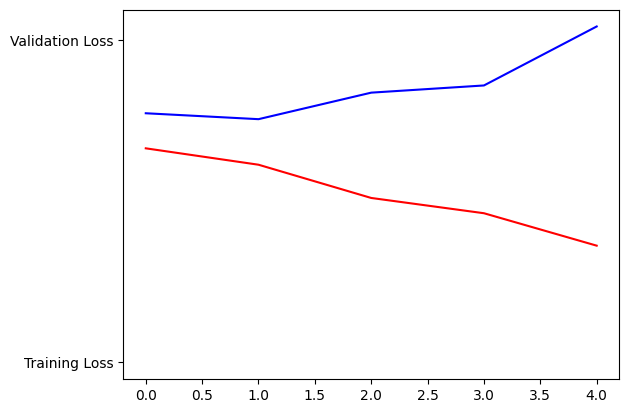

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
print(os.path.join(root_dir, 'validation'))

print(root_dir)
print(validation_dir)

/content/dataset/validation
/content/dataset
/validation


In [ ]:
# Model evaluation

# create evaluation dir
evaluation_dir = os.path.join(root_dir, 'evaluation')

# Define the datasets
datasets = ['without_both', 'either_banner_or_logo', 'both_banner_and_logo']

# Define the ImageDataGenerator
evaluation_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Iterate over each dataset
for dataset in datasets:
    # Remove the existing directory if it exists
    if os.path.exists(evaluation_dir):
        shutil.rmtree(evaluation_dir)

    # Copy the validation directory to the evaluation directory
    shutil.copytree(os.path.join(root_dir, 'validation'), evaluation_dir)

    # Iterate over each directory in the evaluation directory
    for directory in os.listdir(evaluation_dir):
        # If the directory is not the current dataset, remove all files except the first one
        if directory != dataset:
            os.chdir(os.path.join(evaluation_dir, directory))
            keep = os.listdir()
            for file in os.listdir():
                if file != keep[0]:
                    os.remove(file)

    # Create the evaluation generator
    evaluation_generator = evaluation_datagen.flow_from_directory(directory=evaluation_dir,
                                                                  batch_size=20,
                                                                  class_mode='categorical',
                                                                  target_size=(500, 500))

    # Evaluate the model
    print(f"Loss and Accuracy of {dataset}:")
    model.evaluate(evaluation_generator)
    print()


Found 50 images belonging to 3 classes.
Loss and Accuracy of without_both:
3/3 [==============================] - 1s 212ms/step - loss: 2.1732 - accuracy: 0.4000

Found 209 images belonging to 3 classes.
Loss and Accuracy of either_banner_or_logo:
11/11 [==============================] - 2s 183ms/step - loss: 0.2478 - accuracy: 0.9139

Found 67 images belonging to 3 classes.
Loss and Accuracy of both_banner_and_logo:
4/4 [==============================] - 1s 216ms/step - loss: 2.9567 - accuracy: 0.2388



# Try The Model

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(500, 500))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=2)
  print(fn)
  classes_outputs = ['Image has both banner and logo', 'Image has either banner or logo', 'Image has no banner or logo']
  for i in range(len(classes)):
      index = np.where(classes[i] == 1)[0][0]
      print(classes_outputs[index])

Saving 9.png to 9.png
1/1 [==============================] - 0s 26ms/step
9.png
Image has no banner or logo


## Export/Save the model